In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
import  seaborn as sns

In [3]:
df=pd.read_csv(r"D:\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
df.Department.value_counts()

Department
sales          4136
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [5]:
df.isnull().sum()

np.int64(0)

In [15]:
df_dum=pd.get_dummies(df,drop_first=True)

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [16]:
x,y=df_dum.drop('left',axis=1),df_dum['left']
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [25]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred=np.argmax(lr.predict_proba(X_test),axis=1)
y_pred

array([0, 0, 0, ..., 1, 0, 0], shape=(2999,))

<Axes: >

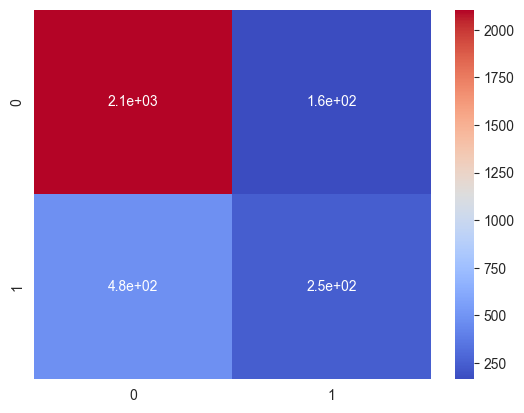

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')